# CS457 Assignment 3

### Student Name: Syed Hammad Ali   
### Student ID: sa04324
### Student Email: sa04324@st.habib.edu.pk

## 1. Credit card applications
<p>Commercial banks receive <em>a lot</em> of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do!</p>
<p><img src="https://assets.datacamp.com/production/project_558/img/credit_card.jpg" alt="Credit card being held in hand"></p>
<p>We'll use the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository. The structure of this notebook is as follows:</p>
<ul>
<li>First, we will start off by loading and viewing the dataset.</li>
<li>We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.</li>
<li>We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.</li>
<li>After our data is in good shape, we will do some exploratory data analysis to build our intuitions.</li>
<li>Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted.</li>
</ul>
<p>First, loading and viewing the dataset. We find that since this data is confidential, the contributor of the dataset has anonymized the feature names.</p>

In [1]:
# Import pandas
import pandas as pd

# Load dataset
cc_apps = pd.read_csv('cc_approvals.csv')

# Inspect data
cc_apps.head()


,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,?,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


## 2. Inspecting the applications
<p>The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy, but <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> gives us a pretty good overview of the probable features. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.   </p>
<p>As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.</p>

In [2]:
# Print summary statistics
cc_apps.describe()

# Inspect missing values in the dataset
cc_apps.info()
cc_apps.isnull().values.any()
cc_apps.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_1   690 non-null    object 
 1   col_2   690 non-null    object 
 2   col_3   690 non-null    float64
 3   col_4   690 non-null    object 
 4   col_5   690 non-null    object 
 5   col_6   690 non-null    object 
 6   col_7   690 non-null    object 
 7   col_8   690 non-null    float64
 8   col_9   690 non-null    object 
 9   col_10  690 non-null    object 
 10  col_11  690 non-null    int64  
 11  col_12  690 non-null    object 
 12  col_13  690 non-null    object 
 13  col_14  690 non-null    object 
 14  col_15  690 non-null    int64  
 15  col_16  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## 3. Handling the missing values (part i)
<p>We've uncovered some issues that will affect the performance of our machine learning model(s) if they go unchanged:</p>
<ul>
<li>Our dataset contains both numeric and non-numeric data (specifically data that are of <code>float64</code>, <code>int64</code> and <code>object</code> types). Specifically, the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.</li>
<li>The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000. Apart from these, we can get useful statistical information (like <code>mean</code>, <code>max</code>, and <code>min</code>) about the features that have numerical values. </li>
<li>Finally, the dataset has missing values, which we'll take care of in this task. The missing values in the dataset are labeled with '?', which can be seen in the last cell's output.</li>
</ul>
<p>Now, let's temporarily replace these missing value question marks with NaN.</p>

In [3]:
# Import numpy
import numpy as np

# Inspect missing values in the dataset
cc_apps.isnull()
# Replace the '?'s with NaN
cc_apps = cc_apps.replace("?" , np.NaN)

# Inspect the missing values again
print(cc_apps.isnull())
cc_apps.isnull().values.sum()

     col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  col_9  col_10  \
0    False  False  False  False  False  False  False  False  False   False   
1    False  False  False  False  False  False  False  False  False   False   
2    False  False  False  False  False  False  False  False  False   False   
3    False  False  False   True  False  False  False  False  False   False   
4    False  False  False  False  False  False  False  False  False   False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
685  False  False  False  False  False  False  False  False  False   False   
686  False  False  False  False  False  False  False  False  False   False   
687  False  False  False  False  False  False  False  False  False   False   
688  False  False  False  False  False  False  False  False  False   False   
689  False  False  False  False  False  False  False  False  False   False   

     col_11  col_12  col_13  col_14  col_15  col_16  
0     Fal

68

In [4]:
for i in cc_apps.columns:
    print(i, cc_apps[i].isnull().sum())

col_1 12
col_2 12
col_3 0
col_4 7
col_5 6
col_6 9
col_7 9
col_8 0
col_9 0
col_10 0
col_11 0
col_12 0
col_13 0
col_14 13
col_15 0
col_16 0


## 4. Handling the missing values (part ii)
<p>We replaced all the question marks with NaNs. This is going to help us in the next missing value treatment that we are going to perform.</p>
<p>An important question that gets raised here is <em>why are we giving so much importance to missing values</em>? Can't they be just ignored? Ignoring missing values can affect the performance of a machine learning model heavily. While ignoring the missing values our machine learning model may miss out on information about the dataset that may be useful for its training. Then, there are many models which cannot handle missing values implicitly such as LDA. </p>
<p>So, to avoid this problem, we are going to impute the missing values with a strategy called mean imputation.</p>

In [5]:

# Impute the missing values with mean imputation
cc_apps.fillna(cc_apps.mean(), inplace = True)
#cc_apps['col_2'].replace(np.NaN, cc_apps['col_2'].mean(), inplace = True)

# Count the number of NaNs in the dataset to verify
cc_apps.isnull().values.sum()
for i in cc_apps.columns:
    print(i, cc_apps[i].isnull().sum())

col_1 12
col_2 12
col_3 0
col_4 7
col_5 6
col_6 9
col_7 9
col_8 0
col_9 0
col_10 0
col_11 0
col_12 0
col_13 0
col_14 13
col_15 0
col_16 0


## 5. Handling the missing values (part iii)
<p>We have successfully taken care of the missing values present in the numeric columns. There are still some missing values to be imputed for columns 0, 1, 3, 4, 5, 6 and 13. All of these columns contain non-numeric data and this why the mean imputation strategy would not work here. This needs a different treatment. </p>
<p>We are going to impute these missing values with the most frequent values as present in the respective columns. This is <a href="https://www.datacamp.com/community/tutorials/categorical-data">good practice</a> when it comes to imputing missing values for categorical data in general.</p>

In [6]:
# Iterate over each column of cc_apps
for col in cc_apps:
    # Check if the column is of object type
    if cc_apps[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(cc_apps.isnull().values.sum())
for i in cc_apps.columns:
    print(i, cc_apps[i].isnull().sum())

0
col_1 0
col_2 0
col_3 0
col_4 0
col_5 0
col_6 0
col_7 0
col_8 0
col_9 0
col_10 0
col_11 0
col_12 0
col_13 0
col_14 0
col_15 0
col_16 0


## 6. Preprocessing the data (part i)
<p>The missing values are now successfully handled.</p>
<p>There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into two main tasks:</p>
<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Scale the feature values to a uniform range.</li>
</ol>
<p>First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. We will do this by using a technique called <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">label encoding</a>.</p>

In [7]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
encoder = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in cc_apps.columns:
    # Compare if the dtype is object
    if cc_apps[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        cc_apps[col]=encoder.fit_transform(cc_apps[col])

## 8. Splitting the dataset into train and test sets
<p>Now that we have our data in a machine learning modeling-friendly shape, we are really ready to proceed towards creating a machine learning model to predict which credit card applications will be accepted and which will be rejected. </p>
<p>First, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing.</p>

In [8]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop features 11 and 13 and convert the DataFrame to a NumPy array
cc_apps = cc_apps.drop(['col_11', 'col_13'], axis=1)
cc_apps2 = cc_apps
cc_apps = cc_apps.to_numpy()
# Segregate features and labels into separate variables
x,y = cc_apps[:,0:13] , cc_apps[:,13]
# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

## 7. Preprocessing the data (part ii)
<p>We have successfully converted all the non-numeric values to numeric ones. </p>
<p>Now, let's try to understand what these scaled values mean in the real world. Let's use <code>CreditScore</code> as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a <code>CreditScore</code> of 1 is the highest since we're rescaling all the values to the range of 0-1.</p>
<p>Also, features like <code>DriversLicense</code> and <code>ZipCode</code> are not as important as the other features in the dataset for predicting credit card approvals. We should drop them to design our machine learning model with the best set of features. This is often called feature engineering or, more specifically, feature selection.</p>

In [9]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler


# Instantiate MinMaxScaler and use it to normzlize attributes
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledx_train = scaler.fit_transform(x_train)
rescaledx_test = scaler.fit_transform(x_test)

## 9. Fitting a logistic regression model to the train set
<p>Essentially, predicting if a credit card application will be approved or not is a <a href="https://en.wikipedia.org/wiki/Statistical_classification">classification</a> task. <a href="http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names">According to UCI</a>, our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved. </p>
<p>This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.</p>
<p>Which model should we pick? A question to ask is: <em>are the features that affect the credit card approval decision process correlated with each other?</em> Although we can measure correlation, that is outside the scope of this notebook, so we'll rely on our intuition that they indeed are correlated for now. Because of this correlation, we'll take advantage of the fact that generalized linear models perform well in these cases. Let's start our machine learning modeling with a Logistic Regression model (a generalized linear model).</p>

In [10]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledx_train, y_train)

LogisticRegression()

## 10. Making predictions and evaluating performance
<p>But how well does our model perform? </p>
<p>We will now evaluate our model on the test set with respect to classification accuracy, precision, recall, specificity and sensitivity. We will also take a look the model's confusion matrix. In the case of predicting credit card applications, it is equally important to see if our machine learning model is able to predict the approval status of the applications as denied that originally got denied. If our model is not performing well in this aspect, then it might end up approving the application that should have been approved. The confusion matrix helps us to view our model's performance from these aspects.  </p>

In [11]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledx_test)

# Get the accuracy score of logreg model and print it
print("Evaluation metrics of logistic regression classifier: ", logreg.score(rescaledx_test, y_test))

# Print confusion matric and all evaluation metrics here
print(confusion_matrix(y_test, y_pred))

Evaluation metrics of logistic regression classifier:  0.8377192982456141
[[93 10]
 [27 98]]


## 11. Fitting another new model of your choice to the same train set
<p>Same description as Question 9 <p>

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=1)
dtc.fit(rescaledx_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=1)

## 12. Making predictions and evaluating performance for new model on same test set
Same description as Question 10

In [13]:
dtc_y_pred = dtc.predict(rescaledx_test)
print("Evaluation metrics of decision tree classifier: ", dtc.score(rescaledx_test, y_test))
print(confusion_matrix(y_test, dtc_y_pred))


Evaluation metrics of decision tree classifier:  0.6622807017543859
[[88 15]
 [62 63]]


## 10.2 ROC Curve
Draw here the ROC curves of both models and comment on that.

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
r_prob = [0 for i in range(len(y_test))]
logreg_pred = logreg.predict_proba(rescaledx_test)
dtc_pred = dtc.predict_proba(rescaledx_test)

logreg_pred = logreg_pred[:,1]
dtc_pred = dtc_pred[:,1]

r_fpr, r_tpr, i = roc_curve(y_test, r_prob)
logreg_fpr, logreg_tpr, i = roc_curve(y_test, logreg_pred)
dtc_fpr, dtc_tpr, i = roc_curve(y_test, dtc_pred)

r_auc = roc_auc_score(y_test, r_prob)
logreg_auc = roc_auc_score(y_test, logreg_pred)
dtc_auc = roc_auc_score(y_test, dtc_pred)

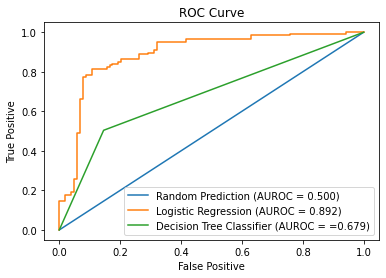

In [15]:
import matplotlib.pyplot as plt

plt.plot(r_fpr, r_tpr, label='Random Prediction (AUROC = %0.3f)' % r_auc)
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUROC = %0.3f)' %logreg_auc)
plt.plot(dtc_fpr, dtc_tpr, label='Decision Tree Classifier (AUROC = =%0.3f)' % dtc_auc)

plt.title('ROC Curve')

plt.xlabel('False Positive')
plt.ylabel('True Positive')

plt.legend()
plt.show()

## 13. Which model is better?
<p>Compare two models and explain which one is better and why?</p>

In [16]:
#LogisticRegression works better because it has better True Positive to False positive ratio than the decision tree clsasifier.

## 14. Feature Ranking 
Apply subset feature selection to rank features and identify top 10 features.

In [17]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

cc_apps2 = cc_apps2.to_numpy()
x,y = cc_apps2[:,0:13] , cc_apps2[:,13]
#print(x[0])
X_new = SelectKBest(chi2, k=10).fit_transform(x, y)
#print(X_new[0])
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)


In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledx_train = scaler.fit_transform(x_train)
rescaledx_test = scaler.fit_transform(x_test)

## 15. Train another logistic regression classifier 
Train a logistic regression classifier with the reduced set of features (top 10) and evaluate its predictions.

In [19]:
logreg2 = LogisticRegression()
logreg2.fit(rescaledx_train, y_train)
y_pred = logreg2.predict(rescaledx_test)
print("Evaluation metrics of logistic regression classifier: ", logreg2.score(rescaledx_test, y_test))
print(confusion_matrix(y_test, y_pred))

Evaluation metrics of logistic regression classifier:  0.8377192982456141
[[93 10]
 [27 98]]


## 16. With and without feature ranking
Is the new classifer with reduced features is doing better then the original one?

In [20]:
#No, both the accuracies are same meaning both classifiers work the same. 